<a href="https://colab.research.google.com/github/PlugnPlayProgramming/python/blob/main/%EB%B6%84%EC%84%9D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**데이터 파일 다운로드(from github)**



In [1]:
!wget https://raw.githubusercontent.com/PlugnPlayProgramming/python/main/SJ_SEC_01_20220727_LiDAR_140738_0.pcd

--2022-08-03 04:20:48--  https://raw.githubusercontent.com/PlugnPlayProgramming/python/main/SJ_SEC_01_20220727_LiDAR_140738_0.pcd
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625511 (611K) [text/plain]
Saving to: ‘SJ_SEC_01_20220727_LiDAR_140738_0.pcd’

SJ_SEC_01_20220727_ 100%[===================>] 610.85K  --.-KB/s    in 0.04s   

2022-08-03 04:20:48 (14.5 MB/s) - ‘SJ_SEC_01_20220727_LiDAR_140738_0.pcd’ saved [625511/625511]



**데이터 파일 읽기(to Pandas)**

In [11]:
import pandas as pd

df_six = pd.DataFrame(columns = ['x' , 'y', 'z', 'intensity'])
with open("SJ_SEC_01_20220727_LiDAR_140738_0.pcd") as file :
    line_cnt = 0
    idx = 0
    for line in file :
        line_cnt += 1

        if line[0].isalpha() : continue # 문자로 시작되는 행은 제외, 처음 시작부분

        pos = line.strip().split()      # 한 줄 읽어서 좌우 공백 제거하고 공백으로 분리함
        if len(pos) < 4 : continue      # 요소가 4개가 아니면 무시함.

        idx += 1
        df_six.loc[idx]=[ float(pos[0]), float(pos[1]), float(pos[2]), float(pos[3]) ]

print(f"df_six.shape={df_six.shape}")

df_six.shape=(15812, 4)


**2차원으로 그리기**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


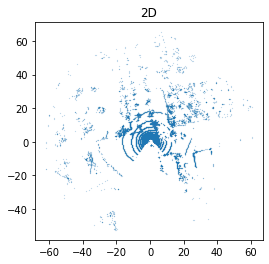

In [15]:
import matplotlib.pyplot as plt

points = df_six.to_numpy()

plt.title('2D')
plt.axes().set_aspect('equal')
plt.scatter(points[:,0], points[:,1], s=0.01)
plt.show()

**3차원으로 그리기(by matplotlib)**

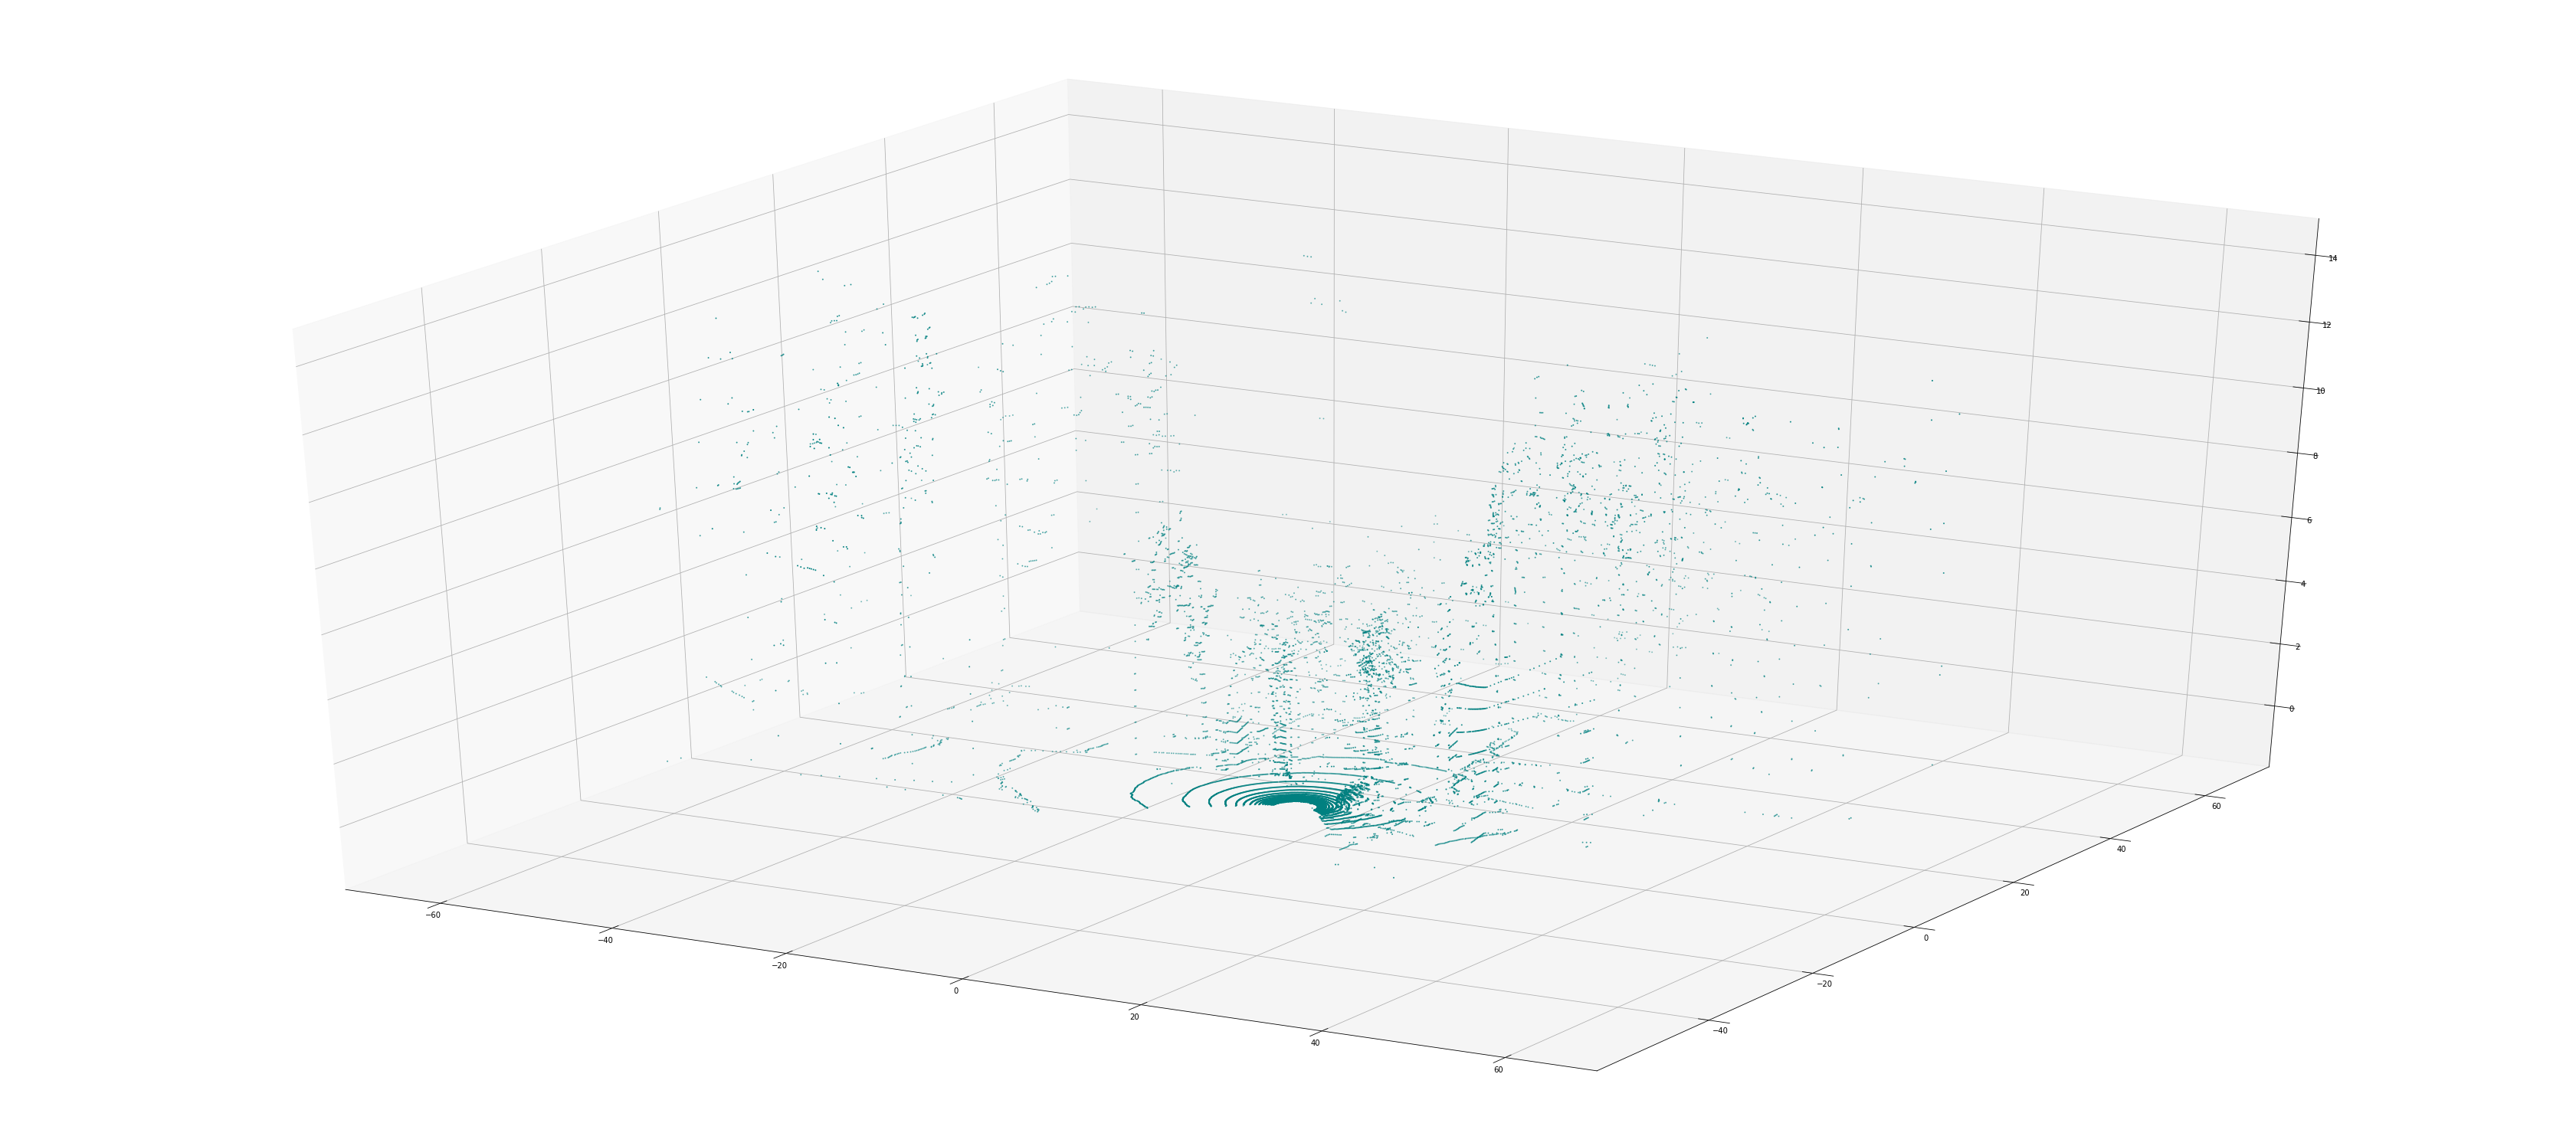

In [24]:
import matplotlib.pyplot as plt

points = df_six.to_numpy()
colors = (0.0, 0.5, 0.5)

fig = plt.figure(figsize=(60, 60))
ax = fig.add_subplot(211,projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors)
plt.show()

**3차원으로 그리기(by plotly)**

In [49]:
import plotly.graph_objects as go

points = df_six.to_numpy()
colors = 'rgba(50, 50, 150, 0.6)'

fig = go.Figure( data=[
        go.Scatter3d(
            x=points[:,0], y=points[:,1], z=points[:,2], 
            mode='markers',
            marker=dict(size=0.4, color=colors)
        )
    ])

fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=2, range=[-100,100],),
        yaxis = dict(nticks=2, range=[-100,100],),
        zaxis = dict(nticks=2, range=[-100,100],),),
    width=700)

fig.show()